# Detecting the difficulty level of French texts




In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
%%capture
! pip install kaggle

In [5]:
!mkdir ~/.kaggle

In [6]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

cp: cannot stat '/content/drive/MyDrive/kaggle.json': No such file or directory


In [8]:
import pandas as pd
import numpy as np

In [9]:
train_data = pd.read_csv('/content/drive/MyDrive/Data Science and Machine Learning/Project_Data_Science/training_data.csv', index_col = 'id')

In [10]:
train_data.head()

,sentence,difficulty
id,,
0,Les coûts kilométriques réels peuvent diverger...,C1
1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1
2,Le test de niveau en français est sur le site ...,A1
3,Est-ce que ton mari est aussi de Boston?,A1
4,"Dans les écoles de commerce, dans les couloirs...",B1


In [11]:
train_data.isnull().sum()

sentence      0
difficulty    0
dtype: int64

In [12]:
train_data.duplicated().sum()

0

In [13]:
X_data = train_data[['sentence']]

In [14]:
y_data = train_data[['difficulty']]

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [17]:
y_train.shape[0]

3840

In [18]:
X_train.shape[0]

3840

In [19]:
%%capture
!pip install -U spacy

In [20]:
%%capture
!python -m spacy download fr_core_news_sm

In [21]:
import spacy
from spacy import displacy
import string

In [22]:
#english language
french = spacy.load('fr_core_news_sm')

In [23]:
def spacy_tokenizer(sentence):

    punctuations = string.punctuation
    stop_words = spacy.lang.fr.stop_words.STOP_WORDS

    # Create token object, which is used to create documents with linguistic annotations.
    mytokens = french(sentence)

    # Lemmatize each token and convert each token into lowercase

    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Remove stop words and punctuation
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]


    # Return preprocessed list of tokens
    return mytokens

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [25]:
%%capture
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.9, norm='l2', encoding='latin-1', ngram_range=(1, 2), tokenizer=spacy_tokenizer)

# Define classifier
classifier = LogisticRegression(solver='lbfgs', max_iter=1000)

# Create pipeline
pipe = Pipeline([('vectorizer', tfidf),
                 ('classifier', classifier)])

# Fit model on training set
pipe.fit(X_train['sentence'], y_train['difficulty'])

In [26]:
level_pred = pipe.predict(X_test['sentence'])

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [28]:
print(f'The accuracy using TF-IDF and Logistic Regression is: {round(accuracy_score(y_test["difficulty"], level_pred), 3)}')
#print(f'Accuracy of the best model: {accuracy_tfidf * 100:.2f}%')
print(f'\nThe precision using TF-IDF and Logistic Regression is: {round(precision_score(y_test["difficulty"], level_pred,average="macro"), 3)}')
print(f'\nThe recall using TF-IDF and Logistic Regression is: {round(recall_score(y_test["difficulty"], level_pred,average="macro"), 3)}')
print(f'\nThe F1-score using TF-IDF and Logistic Regression is: {round(f1_score(y_test["difficulty"], level_pred,average="macro"), 3)}')


The accuracy using TF-IDF and Logistic Regression is: 0.358

The precision using TF-IDF and Logistic Regression is: 0.357

The recall using TF-IDF and Logistic Regression is: 0.358

The F1-score using TF-IDF and Logistic Regression is: 0.357


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

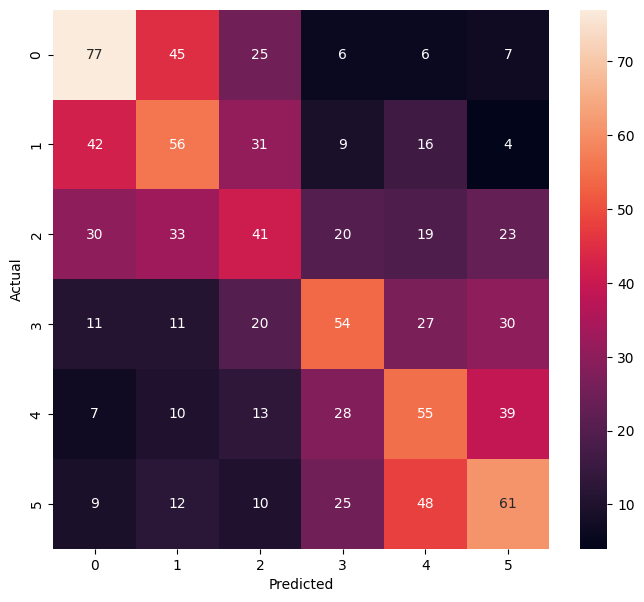

In [30]:
## Confusion matrix
conf_mat = confusion_matrix(y_test, level_pred)
fig, ax = plt.subplots(figsize=(8,7))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()